# Queda livre de um corpo

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Tempos de queda

In [2]:
t = np.linspace(0.,10.,num=20)

In [3]:
t

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [4]:
t2 = t*t

In [5]:
t2

array([  0.        ,   0.27700831,   1.10803324,   2.49307479,
         4.43213296,   6.92520776,   9.97229917,  13.5734072 ,
        17.72853186,  22.43767313,  27.70083102,  33.51800554,
        39.88919668,  46.81440443,  54.29362881,  62.32686981,
        70.91412742,  80.05540166,  89.75069252, 100.        ])

### Parâmentos verdadeiros

In [6]:
h = 10.  # metros
v0 = 10. # metros por segundo
g = 9.8  # metros por segundo ao quadrado

In [7]:
m_true = np.array([h,v0,-g])

### Sensitivity matrix

In [8]:
A = np.empty((t.size,m_true.size))

In [9]:
A[:,0] = np.ones_like(t)
A[:,1] = t
A[:,2] = 0.5*t2

In [10]:
A

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.52631579,  0.13850416],
       [ 1.        ,  1.05263158,  0.55401662],
       [ 1.        ,  1.57894737,  1.2465374 ],
       [ 1.        ,  2.10526316,  2.21606648],
       [ 1.        ,  2.63157895,  3.46260388],
       [ 1.        ,  3.15789474,  4.98614958],
       [ 1.        ,  3.68421053,  6.7867036 ],
       [ 1.        ,  4.21052632,  8.86426593],
       [ 1.        ,  4.73684211, 11.21883657],
       [ 1.        ,  5.26315789, 13.85041551],
       [ 1.        ,  5.78947368, 16.75900277],
       [ 1.        ,  6.31578947, 19.94459834],
       [ 1.        ,  6.84210526, 23.40720222],
       [ 1.        ,  7.36842105, 27.1468144 ],
       [ 1.        ,  7.89473684, 31.1634349 ],
       [ 1.        ,  8.42105263, 35.45706371],
       [ 1.        ,  8.94736842, 40.02770083],
       [ 1.        ,  9.47368421, 44.87534626],
       [ 1.        , 10.        , 50.        ]])

### Observed data

In [11]:
np.random.seed(40)
mu, std = 0.,0.005
r = np.random.normal(mu,std,t.size)

In [12]:
r

array([-0.00303774, -0.00063068, -0.00342303,  0.00464357, -0.00922201,
       -0.00233501,  0.01146245,  0.00244405,  0.00355133,  0.00527767,
        0.00027037,  0.00128977,  0.00294141,  0.00442622, -0.00508504,
       -0.00066847, -0.00219093,  0.00246722, -0.00099505, -0.00637492])

In [13]:
y_obs = np.dot(A,m_true) + r

### Plotting data

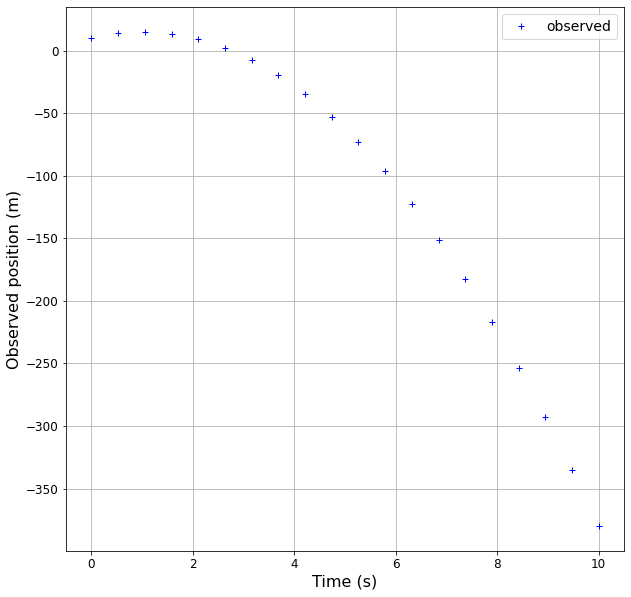

In [14]:
plt.figure(figsize=(10,10))
plt.plot(t, y_obs, 'b+', label = 'observed')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()

file_name = 'images/observed_points'
plt.savefig(file_name+'.png',dpi=300)
plt.show()

## Solving linear system with L2 and L1 norm

### L2-norm

In [15]:
def L2_norm(A,d):
    At = A.T
    AtA = np.dot(At,A)
    Atd = np.dot(At,d)
    m = np.linalg.solve(AtA,Atd)
    return m 

In [16]:
m_L2 = L2_norm(A,y_obs)

In [17]:
y_L2 = np.dot(A,m_L2)

### Visualization the results

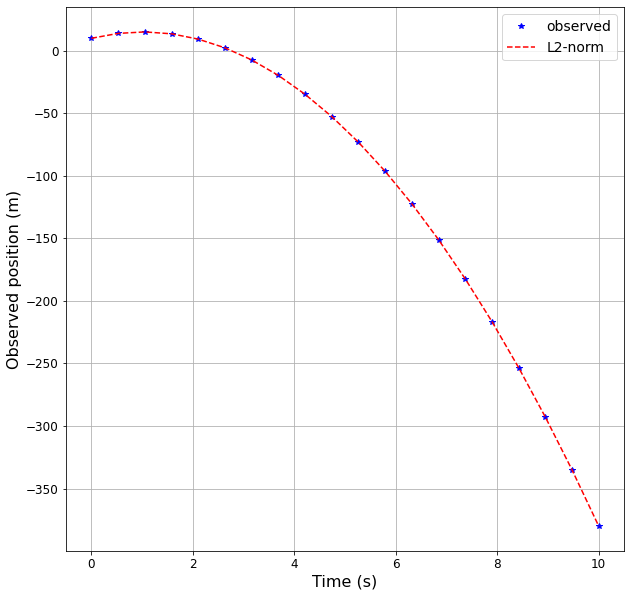

In [18]:
plt.figure(figsize=(10,10))
plt.plot(t, y_obs, 'b*', label = 'observed')
plt.plot(t, y_L2, 'r--', label = 'L2-norm')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

### Comparison with estimated and true parameters

In [19]:
print (m_true)
print (m_L2)

[10.  10.  -9.8]
[ 9.99648914 10.0025595  -9.80052885]
